#Introduction to Machine Learning

In [93]:
######################DATA Preparation#############################################

In [3]:
import pandas as pd

In [4]:
#Load the data

In [9]:
cohort = pd.read_csv('./eicu_cohort.csv')

In [10]:
cohort.head()

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight
0,Male,45.0,116.0,3.0778,41,46,ALIVE,109.0,154.0,1.01,36.20,41.0,10.0,178.0
1,Male,57.0,NaN,7.6736,26,31,ALIVE,106.0,46.0,-1.00,36.30,6.0,10.1,172.7
2,Female,59.0,66.6,15.0778,56,61,ALIVE,134.0,172.0,1.03,34.80,32.0,25.5,170.2
3,Male,63.0,71.9,1.3201,77,88,EXPIRED,133.0,40.0,4.30,32.60,39.0,12.6,167.6
4,Male,67.0,104.8,1.5257,75,88,EXPIRED,31.0,133.0,0.70,36.44,31.0,11.3,182.9


In [12]:
#pip install tableone

In [13]:
from tableone import tableone

In [21]:
#rename columns using a Dictionary and change key names

In [15]:
rename = {"unabridgedhosplos":"length of stay", "meanbp": "mean blood pressure", "wbc": "white cell count"}

In [30]:
#tableone?? or help(tableone) #to get help

In [16]:
#view summary characteristics

In [28]:
t1 = tableone (cohort, groupby="actualhospitalmortality", rename=rename, pval=True, htest_name=True)

In [29]:
t1

Grouped by actualhospitalmortality                                                                                             
                                                                   Missing       Overall         ALIVE       EXPIRED P-Value                                       Test
n                                                                                    235           195            40                                                   
gender, n (%)                   Female                                   0    116 (49.4)    101 (51.8)     15 (37.5)   0.028  Chi-squared (warning: expected count < 5)
                                Male                                          118 (50.2)     94 (48.2)     24 (60.0)                                                   
                                Unknown                                          1 (0.4)                     1 (2.5)                                                   
age, mean (SD)                                                           9   61.9 (15.5)   60.5 (15.8)   69.3 (11.5)  <0.001                          Two Sample T-test
admissionweight, mean (SD)                                               5   87.6 (28.0)   88.6 (28.8)   82.3 (23.3)   0.140                          Two Sample T-test
length of stay, mean (SD)                                                0     9.2 (8.6)     9.6 (7.5)    6.9 (12.5)   0.189                          Two Sample T-test
acutephysiologyscore, mean (SD)                                          0   59.9 (28.1)   54.5 (23.1)   86.7 (34.7)  <0.001                          Two Sample T-test
apachescore, mean (SD)                                                   0   71.2 (30.3)   64.6 (24.5)  103.5 (34.9)  <0.001                          Two Sample T-test
heartrate, mean (SD)                                                     0  108.7 (33.1)  107.9 (30.6)  112.9 (43.2)   0.490                          Two Sample T-test
mean blood pressure, mean (SD)                                           0   93.2 (47.0)   92.1 (45.4)   98.6 (54.5)   0.482                          Two Sample T-test
creatinine, mean (SD)                                                    0     1.0 (1.7)     0.9 (1.7)     1.7 (1.6)   0.007                          Two Sample T-test
temperature, mean (SD)                                                   0    35.2 (6.5)    36.1 (3.9)   31.2 (12.4)   0.018                          Two Sample T-test
respiratoryrate, mean (SD)                                               0   30.7 (15.2)   29.9 (15.1)   34.3 (15.6)   0.110                          Two Sample T-test
white cell count, mean (SD)                                              0    10.5 (8.4)    10.7 (8.2)     9.7 (9.7)   0.576                          Two Sample T-test
admissionheight, mean (SD)                                               2  168.0 (12.8)  167.7 (13.4)   169.4 (9.1)   0.353                          Two Sample T-test
[1] Chi-squared tests for the following variables may be invalid due to the low number of observations: gender.

In [19]:
#Output to laTeX

In [20]:
print(t1.tabulate(tablefmt = "latex"))

\begin{tabular}{llllll}
\hline
                                 &         & Missing   & Overall      & ALIVE        & EXPIRED      \\
\hline
 n                               &         &           & 235          & 195          & 40           \\
 gender, n (\%)                   & Female  & 0         & 116 (49.4)   & 101 (51.8)   & 15 (37.5)    \\
                                 & Male    &           & 118 (50.2)   & 94 (48.2)    & 24 (60.0)    \\
                                 & Unknown &           & 1 (0.4)      &              & 1 (2.5)      \\
 age, mean (SD)                  &         & 9         & 61.9 (15.5)  & 60.5 (15.8)  & 69.3 (11.5)  \\
 admissionweight, mean (SD)      &         & 5         & 87.6 (28.0)  & 88.6 (28.8)  & 82.3 (23.3)  \\
 length of stay, mean (SD)       &         & 0         & 9.2 (8.6)    & 9.6 (7.5)    & 6.9 (12.5)   \\
 acutephysiologyscore, mean (SD) &         & 0         & 59.9 (28.1)  & 54.5 (23.1)  & 86.7 (34.7)  \\
 apachescore, mean (SD)          &

In [33]:
#check current type-Encoding

In [32]:
print(cohort.dtypes)

gender                      object
age                        float64
admissionweight            float64
unabridgedhosplos          float64
acutephysiologyscore         int64
apachescore                  int64
actualhospitalmortality     object
heartrate                  float64
meanbp                     float64
creatinine                 float64
temperature                float64
respiratoryrate            float64
wbc                        float64
admissionheight            float64
dtype: object


In [34]:
# convert to a categorical type

In [35]:
categories=['ALIVE', 'EXPIRED']

In [38]:
#overwrite actualhospitalmortality with actualhospitalmortality but best to create a new column

In [36]:
cohort['actualhospitalmortality']  = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)

In [39]:
cohort['actualhospitalmortality'].head()

0      ALIVE
1      ALIVE
2      ALIVE
3    EXPIRED
4    EXPIRED
Name: actualhospitalmortality, dtype: category
Categories (2, object): ['ALIVE', 'EXPIRED']

In [40]:
# add the encoded value to a new column

In [44]:
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes

In [45]:
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

,actualhospitalmortality_enc,actualhospitalmortality
0,0,ALIVE
1,0,ALIVE
2,0,ALIVE
3,1,EXPIRED
4,1,EXPIRED


In [52]:
# convert to a categorical type

In [49]:
cohort['gender'] = pd.Categorical(cohort['gender'])

In [50]:
cohort['gender'] = cohort['gender'].cat.codes

In [51]:
cohort['gender'].head()

0    1
1    1
2    0
3    1
4    1
Name: gender, dtype: int8

In [73]:
from sklearn.model_selection import train_test_split# split our data into training and test datasets i.e patient 1 into x and patient 2 into y

In [72]:
cohort

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,actualhospitalmortality,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight,actualhospitalmortality_enc
0,1,45.0,116.00,3.0778,41,46,ALIVE,109.0,154.0,1.01,36.20,41.0,10.0,178.0,0
1,1,57.0,NaN,7.6736,26,31,ALIVE,106.0,46.0,-1.00,36.30,6.0,10.1,172.7,0
2,0,59.0,66.60,15.0778,56,61,ALIVE,134.0,172.0,1.03,34.80,32.0,25.5,170.2,0
3,1,63.0,71.90,1.3201,77,88,EXPIRED,133.0,40.0,4.30,32.60,39.0,12.6,167.6,1
4,1,67.0,104.80,1.5257,75,88,EXPIRED,31.0,133.0,0.70,36.44,31.0,11.3,182.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,-1,54.0,72.50,9.0049,102,107,ALIVE,113.0,69.0,1.70,38.50,41.0,24.3,177.8,0
231,-1,70.0,89.70,6.0743,49,75,ALIVE,86.0,51.0,0.90,36.70,34.0,0.7,162.5,0
232,-1,54.0,109.10,12.7549,40,45,ALIVE,52.0,126.0,1.50,37.00,4.0,6.9,162.5,0
233,-1,25.0,99.79,0.7896,23,23,ALIVE,102.0,125.0,1.00,36.10,34.0,12.1,69.0,0


In [67]:
x = cohort.drop('actualhospitalmortality', axis=1) #the dataset variable x and drop a column

In [76]:
y = cohort['actualhospitalmortality']# predict our label 'y',  i.e. ALIVE or EXPIRED

In [59]:
#outcome variable is actualhospitalmortality, y_test, x_test 

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)#create a training and a test set

In [117]:
x_train

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight,actualhospitalmortality_enc
126,-1,77.0,102.00,9.4910,66,83,51.0,40.0,1.10,35.0,4.0,10.43,150.00,0
79,-1,51.0,92.00,11.5667,76,81,111.0,146.0,0.60,36.9,53.0,9.30,163.80,0
5,-1,61.0,57.80,4.9063,56,67,126.0,52.0,0.48,36.6,30.0,28.40,172.70,0
56,-1,75.0,112.90,4.0521,36,53,132.0,154.0,1.05,36.7,40.0,-1.00,177.80,0
120,-1,47.0,67.50,7.3410,51,56,106.0,134.0,0.58,37.1,30.0,9.70,160.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1,NaN,58.96,0.5000,85,109,39.0,40.0,1.50,-1.0,28.0,14.70,162.56,1
14,-1,55.0,99.00,10.0049,72,77,104.0,126.0,0.51,35.6,8.0,8.50,172.70,0
92,-1,22.0,51.40,4.0264,55,55,128.0,158.0,3.43,35.8,4.0,15.20,157.50,0
179,-1,35.0,101.70,5.9097,57,67,112.0,183.0,0.80,36.4,6.0,26.90,167.60,0


In [118]:
y_train

126      ALIVE
79       ALIVE
5        ALIVE
56       ALIVE
120      ALIVE
        ...   
106    EXPIRED
14       ALIVE
92       ALIVE
179      ALIVE
102      ALIVE
Name: actualhospitalmortality, Length: 164, dtype: category
Categories (2, object): ['ALIVE', 'EXPIRED']

In [66]:
# impute missing values from the training set

In [119]:
x_train = x_train.fillna(x_train.median())#fill and a method to get the median and fill the missing values in the training set with the median to avoid
#data leakage or sparse data

In [120]:
x_test = x_test.fillna(x_train.median())#same for training test data

In [121]:
x_train.head()

,gender,age,admissionweight,unabridgedhosplos,acutephysiologyscore,apachescore,heartrate,meanbp,creatinine,temperature,respiratoryrate,wbc,admissionheight,actualhospitalmortality_enc
126,-1,77.0,102.0,9.4910,66,83,51.0,40.0,1.10,35.0,4.0,10.43,150.0,0
79,-1,51.0,92.0,11.5667,76,81,111.0,146.0,0.60,36.9,53.0,9.30,163.8,0
5,-1,61.0,57.8,4.9063,56,67,126.0,52.0,0.48,36.6,30.0,28.40,172.7,0
56,-1,75.0,112.9,4.0521,36,53,132.0,154.0,1.05,36.7,40.0,-1.00,177.8,0
120,-1,47.0,67.5,7.3410,51,56,106.0,134.0,0.58,37.1,30.0,9.70,160.0,0


In [122]:
#Normalise the variables before putting into the model i.e. scaling variables

In [81]:
# Define the scaler

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler() # create a class

In [111]:
# Alternative is zero mean, unit variance
## Subtract mean, divide by standard deviation
from sklearn.preprocessing import StandardScaler

In [124]:
# fit the scaler on the training dataset
scaler.fit(x_train)#scaler object

MinMaxScaler()

In [125]:
# scale the training set and transform
x_train = scaler.transform(x_train)

In [126]:
# scale the test set
x_test = scaler.transform(x_test)

In [127]:
x_train

array([[0.        , 0.83823529, 0.2604887 , ..., 0.38877551, 0.66666667,
        0.        ],
       [0.        , 0.45588235, 0.21438451, ..., 0.35034014, 0.78024691,
        0.        ],
       [0.        , 0.60294118, 0.05670816, ..., 1.        , 0.85349794,
        0.        ],
       ...,
       [0.        , 0.02941176, 0.02720148, ..., 0.55102041, 0.72839506,
        0.        ],
       [0.        , 0.22058824, 0.25910558, ..., 0.94897959, 0.81152263,
        0.        ],
       [0.        , 0.58823529, 0.37067773, ..., 0.55782313, 0.85349794,
        0.        ]])

In [92]:
######################end of DATA Preparation#############################################

In [128]:
###################start of Learning #######################################

In [129]:
import pandas as pd

In [130]:
# Create sample labelled data for supervised learning

In [131]:
data = {'x': [1, 2, 3, 4, 5], 'y': [-0.5, 1, 2, 4, 7]}

In [132]:
df = pd.DataFrame(data)

In [133]:
df

,x,y
0,1,-0.5
1,2,1.0
2,3,2.0
3,4,4.0
4,5,7.0


In [141]:
# Add predictions-manual predictions
df['y_hat'] = [0, 2, 4, 6, 8]#changing this so the model gets closer to the data

Text(0.5, 1.0, 'Prediction error')

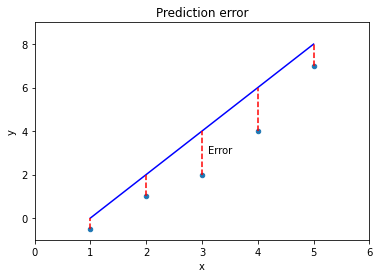

In [136]:
# plot the data
ax = df.plot(x='x', y='y', kind='scatter', xlim=[0,6], ylim=[-1,9])
# plot approx line of best fit
ax.plot(df['x'], df['y_hat'], color='blue');
# plot error
ax.vlines(x=df['x'], ymin=df['y'], ymax=df['y_hat'], color='red', linestyle='dashed')
ax.text(x=3.1, y=3, s='Error')
ax.set_title('Prediction error')

In [143]:
import numpy as np

def loss(y,y_hat):
    """
    Loss function (mean squared error). for Linear Regression method as above

    Args:
        y (numpy array): The known target values.
        y_hat (numpy array): The predicted values.

    Returns:
        numpy float: The mean squared error.
    """
    
    distances = y-y_hat
    squared_distances = np.square(distances)
    return np.mean(squared_distances)

In [144]:
loss(df['y'],df['y_hat'])

2.05

Text(0, 0.5, 'Loss (squared error)')

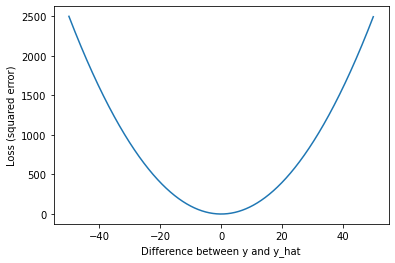

In [152]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-50, 50, 0.05)
y = np.square(x)

plt.plot(x, y)
plt.xlabel('Difference between y and y_hat')
plt.ylabel('Loss (squared error)')
#the plot shows the losses of the loss function-mean square error (M.S.E) and how the model fits the data/how the model is doing
#loss functions are used to decide what parameters to train the Machine Learning model

In [153]:
###########################Modelling###############################################

In [154]:
########Linear regression model for Machine Learning#############

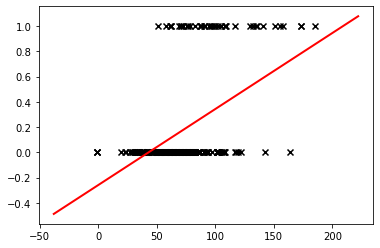

In [163]:
# import the regression model
#we need the model to learn the w weight and the bias b
#y_hat = wX+b
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
reg = LinearRegression()#create an instance of the model from sklearn

# use a single feature (apache score)
# note: remove the reshape if fitting to >1 input variable
#and reshape the data
X = cohort.apachescore.values.reshape(-1, 1)#apache-IV score
y = cohort.actualhospitalmortality_enc.values
#1 partients survived-mortality
#0 patients died

# fit the model to our data
reg = reg.fit(X, y)

# get the y values
buffer = 0.2*max(X)
X_fit = np.linspace(min(X) - buffer, max(X) + buffer, num=50)
y_fit = reg.predict(X_fit)

# plot
plt.scatter(X, y,  color='black', marker = 'x')
plt.plot(X_fit, y_fit, color='red', linewidth=2)
plt.show()

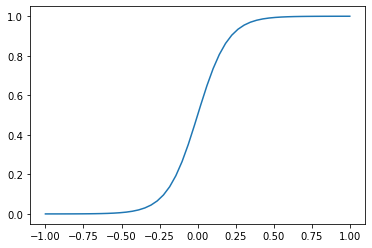

In [166]:
def sigmoid(x, k=0.1):
    #k is the kernel value of the function and affects the steepness
    """
    Sigmoid function. 
    Adjust k to set slope.
    To create an S shape curve to take any number and map it from 0 and 1
    """
    s = 1 / (1 + np.exp(-x / k)) 
    return s

# set range of values for x
x = np.linspace(-1, 1, 50)

plt.plot(x, sigmoid(x))
plt.show()

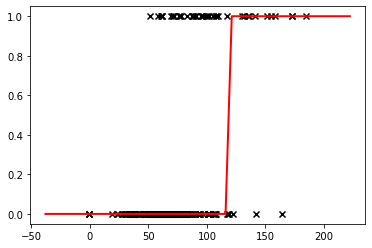

In [167]:
# import the regression model
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

# use a single feature (apache score)
# note: remove the reshape if fitting to >1 input variable
X = cohort.apachescore.values.reshape(-1, 1)
y = cohort.actualhospitalmortality_enc.values

# fit the model to our data
reg = reg.fit(X, y)

# get the y values
buffer = 0.2*max(X)
X_fit = np.linspace(min(X) - buffer, max(X) + buffer, num=50)
y_fit = reg.predict(X_fit)

# plot
plt.scatter(X, y,  color='black', marker = 'x')
plt.plot(X_fit, y_fit, color='red', linewidth=2)
plt.show()

In [177]:
#For example, we could classify probabilities of < 0.5 as “ALIVE” and >= 0.5 as “EXPIRED”
x = [[90]]#set apache score of 90
outcome = reg.predict(x)

In [172]:
outcome

array([0], dtype=int8)

In [175]:
probs = reg.predict_proba(x)[0]
probs

array([0.76578699, 0.23421301])

In [176]:
print(f'For x={x[0][0]}, we predict an outcome of "{outcome[0]}".\n'
      f'Class probabilities (0, 1): {round(probs[0],2), round(probs[1],2)}.')

For x=90, we predict an outcome of "0".
Class probabilities (0, 1): (0.77, 0.23).


In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# convert outcome to a categorical type
categories=['ALIVE', 'EXPIRED']
cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)
# add the encoded value to a new column
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

# define features and outcome
features = ['apachescore']
outcome = ['actualhospitalmortality_enc']

# partition data into training and test sets
X = cohort[features]
y = cohort[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.ravel()

# train model and fit logistic regression
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

# generate some predictions
y_hat_train = reg.predict(x_train)
y_hat_test = reg.predict(x_test)

#  accuracy on training set
acc_train = np.mean(y_hat_train == y_train)
print(f'Accuracy on training set: {acc_train:.2f}')

#  accuracy on test set
acc_test = np.mean(y_hat_test == y_test)
print(f'Accuracy on test set: {acc_test:.2f}')


Accuracy on training set: 0.86
Accuracy on test set: 0.82


In [187]:
####################Cross Validation##########################
#partition data into 5 folds-splits,repetition of 3 times =15 model training steps

In [188]:
from numpy import mean, std
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# define dataset
X = x_train
y = y_train

# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))#item in the list to scale data
steps.append(('model', LogisticRegression()))#step that train model
pipeline = Pipeline(steps=steps)#create pipeline object

# define the evaluation procedure
#cv =cross-validation object
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Cross-validation accuracy, mean (std): %.2f (%.2f)' % (mean(scores)*100, std(scores)*100))

Cross-validation accuracy, mean (std): 81.53 (3.31)


In [191]:
#################### Model Evaluation##########################

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# convert outcome to a categorical type
categories=['ALIVE', 'EXPIRED']
cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)

# add the encoded value to a new column
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

# define features and outcome
features = ['apachescore']
outcome = ['actualhospitalmortality_enc']

# partition data into training and test sets
X = cohort[features]
y = cohort[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state =  42)

# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.ravel()

# train model
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

# generate predictions
y_hat_test = reg.predict(x_test)
y_hat_test_proba = reg.predict_proba(x_test)

In [194]:
probs = y_hat_test_proba[:,1][:12]#chosen cut offs
rounded_probs = [round(x,2) for x in probs]
print(rounded_probs)#ground tree values

[0.09, 0.11, 0.23, 0.21, 0.23, 0.21, 0.19, 0.03, 0.2, 0.67, 0.54, 0.72]


In [195]:
print(y_hat_test[:12])# y_hat_test the prediction

[0 0 0 0 0 0 0 0 0 1 1 1]


In [196]:
#True Negative =TN=0-survived patient
#True Positive =TP= 1

In [197]:
######################Confusion matrices#######################

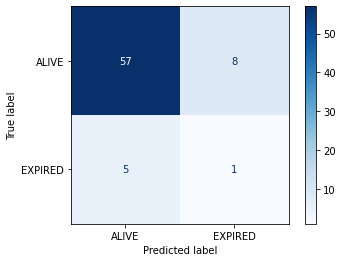

In [204]:
# import the metrics class 
#show classification
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_hat_test)#y_test ground tree values, y_hat_test the prediction

class_names=cohort['actualhospitalmortality'].cat.categories
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    reg, x_test, y_test, display_labels=class_names,
    cmap=plt.cm.Blues)

plt.show()

In [200]:
acc = metrics.accuracy_score(y_test, y_hat_test)
print(f"Accuracy (model) = {acc:.2f}")

Accuracy (model) = 0.82


In [202]:
zeros = np.zeros(len(y_test))
acc = metrics.accuracy_score(y_test, zeros)
print(f"Accuracy (zeros) = {acc:.2f}")

Accuracy (zeros) = 0.92


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


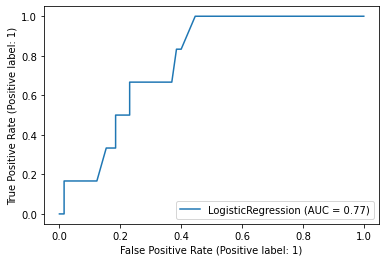

In [203]:
metrics.plot_roc_curve(reg, x_test, y_test)

In [205]:
###################Boosttrapping#################################

In [206]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# convert outcome to a categorical type
categories=['ALIVE', 'EXPIRED']
cohort['actualhospitalmortality'] = pd.Categorical(cohort['actualhospitalmortality'], categories=categories)

# add the encoded value to a new column
cohort['actualhospitalmortality_enc'] = cohort['actualhospitalmortality'].cat.codes
cohort[['actualhospitalmortality_enc','actualhospitalmortality']].head()

# define features and outcome
features = ['apachescore']
outcome = ['actualhospitalmortality_enc']

# partition data into training and test sets
X = cohort[features]
y = cohort[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

# restructure data for input into model
# note: remove the reshape if fitting to >1 input variable
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.ravel()
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.ravel()

# train model
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(x_train, y_train, replace=True)
    # make predictions
    y_hat = reg.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

/opt/conda/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


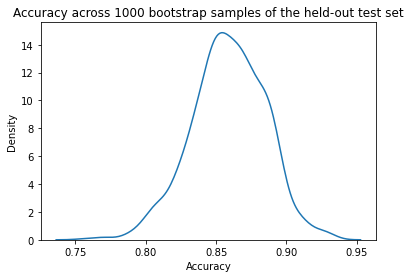

In [207]:
import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

In [208]:
##################Percentile method####################

In [209]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.86 with a 95% a confidence interval of [0.80,0.91].


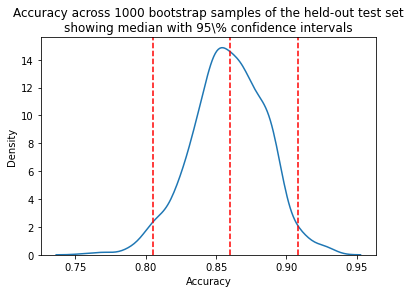

In [210]:
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

In [211]:
################Data Leakage####################